# Hotel Bookings: An EDA, and Classifier Comparison
---
Author: _Nathan Swedlund_

Date: _02-25-20_

Data source: _https://www.kaggle.com/jessemostipak/hotel-booking-demand/data_

---

## Summary

This is an exploratory data analysis(EDA) of hotel bookings, with a specific focus on cancelations. I will start by reading in the data, followed by some simple exploration of the data. After this, I will make a classifier, to try to predict the likelyhood of a cancelation occurring

## Setup
---

### Importing needed libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

from matplotlib.colors import ListedColormap # for making palettes

### Reading in data:

Here I am reading in the data we will be using throughout the remainder of this notebook.

In [2]:
# Data source: _https://www.kaggle.com/jessemostipak/hotel-booking-demand/data_
# Reading data from csv file
path = "../Data Sets/hotel_bookings.csv"
hotel_booking_df = pd.read_csv(path)
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Splitting Data
For the purposes of evaluating our calssifiers, I will be doing a test/train split. Because the dataset is so large, both the training and testing sections can be fairly big. Given this, I will simply do a 1:1 split ratio. I will be comparing classifiers by trying to predict whether or not a booking is cancelled

In [3]:
# Getting features to be used in classifiers
features = [x for x in hotel_booking_df]
#  Removing target and target related columns
removal = ["is_canceled", "reservation_status", "reservation_status_date"]
for i in removal:
    features.remove(i)

# Making a Factorized copy of "hotel_booking_df"
hotel_booking_df_factorize = pd.DataFrame()
booking_classes = []
for i in hotel_booking_df:
    hotel_booking_df_factorize[i], booking_class = pd.factorize(hotel_booking_df[i])
    booking_classes.append(booking_class)
    
# Splitting the data
training = hotel_booking_df_factorize[hotel_booking_df_factorize.index %2 != 0]
testing = hotel_booking_df_factorize[hotel_booking_df_factorize.index %2 == 0]

# Data and target for classifier training
X_train = training[features]
y_train = training["is_canceled"]

# Data and target for classifier testing
X_test = testing[features] # Training data
y_true = testing["is_canceled"]

---

## Exploration
---

### Visualizing Cancelations

In [4]:
# Grouping the data by month
agg = hotel_booking_df.groupby('country')
# months = ['January','February','March','April','May','June','July','August','September','October','November','December']

# getting the sum and mean 
agg_sum = agg.sum()#.reindex(months)
# agg_sum.index = [x[0:3] for x in agg_sum.index ]

agg_count = agg.count()#.reindex(months)
agg_mean = agg.mean()#.reindex(months)

# Getting just the first three characters of each month name for plotting purposes
# # agg_count.index = [x[:3] for x in agg_sum.index ]

# plt.figure(figsize=(8,6))

# # total reservations
# sns.barplot(data=agg_count, x=agg_count.index, y="is_canceled", palette="bright")
# # cancelations
# sns.barplot(data=agg_sum, x=agg_sum.index, y="is_canceled", palette="dark")

# # labeling and showing plot
# plt.ylabel("Reservations")
# plt.title("Total Cancelations per Month")
# plt.show()
# agg_mean.sort_values("is_canceled", ascending=False)
agg_sum["country_count"] = agg_count["hotel"]
# test = agg_count.sort_values("hotel", ascending=False)
# test = test[test.hotel > 100]
# test

percentage = agg_sum[agg_sum.country_count > 100][["is_canceled", "country_count"]].copy()
percentage["cancel_percentage"] = percentage["is_canceled"]/percentage["country_count"]*100

percentage.sort_values("cancel_percentage")



,is_canceled,country_count,cancel_percentage
country,,,
SRB,3,101,2.970297
JPN,28,197,14.213198
FIN,69,447,15.436242
DEU,1218,7287,16.714697
AUT,230,1263,18.210610
NLD,387,2104,18.393536
FRA,1934,10415,18.569371
CN,254,1279,19.859265
GBR,2453,12129,20.224256


In this graph the dark regions are the number of reservations that have been canceled, and the bright regions are the reservations that were held. It's clear that a lot of reservations are not held, but how many?

### Getting cancelation numbers

In [5]:
canceled = len(hotel_booking_df[hotel_booking_df.is_canceled == 1])
held = len(hotel_booking_df[hotel_booking_df.is_canceled == 0])
total = held+canceled

print(f"{total} total reservations.")
print(f"{held} reservations were held.")
print(f"{canceled} reservations were canceled.")
print(f"\nThis gives us a {canceled/total*100:3.3}% cancelation rate.")

119390 total reservations.
75166 reservations were held.
44224 reservations were canceled.

This gives us a 37.0% cancelation rate.


---

## Classifier Comparison 
---

In this section, I am going to train a classifier to predict whether or not a reservation will be canceled. To do this, I will first split the data in two. The first part will be what I use to train the classifier, the second will be used to test the classifier.

### Creating Classifiers
In this section I will make three classifiers. First I will create decision tree, then a naive Bayes. After this I will make a K nearest neighbors classifier. In order to have a fair comparison, I will find the optimal values for the classifiers before comparison.

Once these are all made I will be comparing results and analyzing which works best on this data.

### Finding Optimal Classifier Parameters
First, I will find the optimal number of neighbors for the K-nearest neigbbors classifier, then I will find the optimal max depth for the decision tree classifier.

Note: For my purposes here, "optimal" means the most most accurate.

_Finding optimal k_

In [11]:
# Getting scores for every other k between 1 and 10 (Might take a few minutes to run)
scoresKNN = []
max_k_tested = 10
for i in range(1, max_k_tested+1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    scoresKNN.append(clf.score(X_test, y_true))

[0.7869168272049586, 0.7997487226735908, 0.7819415361420554, 0.789999162408912, 0.7765642013568975, 0.7842700393667812, 0.7739006616969596, 0.7774520479102103, 0.7717061730463188, 0.7732975961135774]


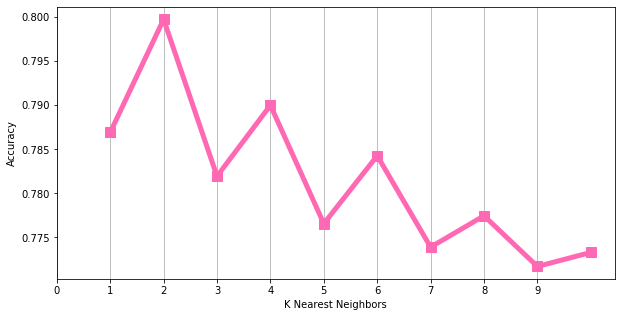

In [13]:
# And plotting those scores  
plt.figure(figsize=(10,5))
plt.plot(np.linspace(1, max_k_tested, max_k_tested), scoresKNN, marker="s", ms=10, lw=5, color="hotpink")
plt.xticks([x for x in range(max_k_tested)])
plt.ylabel("Accuracy")
plt.xlabel("K Nearest Neighbors")
print(scoresKNN)
plt.grid(axis="x")

Clearly, the optimal value of k is 2

_Finding optimal max depth_

In [18]:
# Getting scores for every max_depth between 1 and 20
scoresDT = []
max_MD_tested = 30
for i in range(1, max_MD_tested+1):
    clf = DecisionTreeClassifier(max_depth=i, random_state=1)
    clf.fit(X_train, y_train)
    scoresDT.append(clf.score(X_test, y_true))

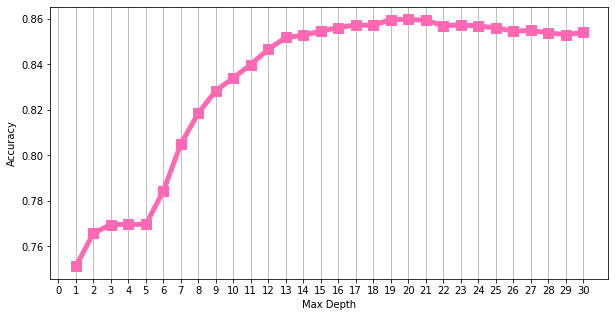

In [19]:
# And plotting those scores  
plt.figure(figsize=(10,5))
plt.plot(np.linspace(1, max_MD_tested, max_MD_tested), scoresDT, marker="s", ms=10, lw=5, color="hotpink")
plt.xticks([x for x in range(max_MD_tested+1)])
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.grid(axis="x")

Creating Calssifiers

In [ ]:
# Constants for classifiers
NEIGHBORS = 2
MAX_DEPTH = 28

# Classifiers & classifier names
clfs = [
    KNeighborsClassifier(n_neighbors=NEIGHBORS),
    DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=1),
    GaussianNB()
]
names = [
    "K-Neighbors Classifier",
    "Decision Tree Classifier",
    "Gaussian Naive Bayes Classifier"
]

Creating Fitting Classifiers

In [ ]:
for clf in clfs:
    clf.fit(X_train, y_train)

Ecaluating each classifier

In [ ]:
# Fitting each classifier, and printing its score
for clf, name in zip(clfs, names):
    print("The "+name+f" correctly classifies {clf.score(X_test,y_true)*100:3.3}% of the test data.")cv

Given the classifier has a ~80% success rate, we should expect slightly less from our testing data.



Here's a plot of the decision tree (double click the plot to zoom)

In [ ]:
# plt.figure(figsize=(30,30))
# tree.plot_tree(clfs[1],filled=True, feature_names=features, class_names=['held','canceled'])
# plt.show()
feat_importanve = clfs[1].feature_importances_

importances = pd.DataFrame({"importance":feat_importanve, "name":features } )
importances = importances.sort_values("importance", ascending=False)
importances

Five most important Features

In [ ]:
features = importances.head()["name"]

# Data and target for classifier training
X_train = training[features]
y_train = training["is_canceled"]

# Data and target for classifier testing
X_test = testing[features] # Training data
y_true = testing["is_canceled"]
# X_test

---

In [ ]:
# Getting scores for every k between 1 and 10 (Might take a few minutes to run)
scoresKNN = []
max_k_tested = 10
for i in range(1, max_k_tested+1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    scoresKNN.append(clf.score(X_test, y_true))

In [ ]:
# And plotting those scores  
plt.figure(figsize=(10,5))
plt.plot(np.linspace(1, max_k_tested, max_k_tested), scoresKNN, marker="s", ms=10, lw=5, color="lightblue")
plt.xticks([x for x in range(max_k_tested+1)])
plt.ylabel("Accuracy")
plt.xlabel("K Nearest Neighbors")
plt.grid(axis="x")

Clearly, the optimal value of k is 2

_Finding optimal max depth_

In [ ]:
# Getting scores for every max_depth between 1 and 10 (Might take a few minutes to run)
scoresDT = []
max_MD_tested = 40
for i in range(1, max_MD_tested+1):
    clf = DecisionTreeClassifier(max_depth=i, random_state=1)
    clf.fit(X_train, y_train)
    scoresDT.append(clf.score(X_test, y_true))

In [ ]:
# And plotting those scores  
plt.figure(figsize=(10,5))
plt.plot(np.linspace(1, max_MD_tested, max_MD_tested), scoresDT, marker="s", ms=10, lw=5, color="lightblue")
plt.xticks([x for x in range(max_MD_tested+1)])
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.grid(axis="x")

In [ ]:
clf.feature_importances_

It looks like the score doesn't get much better than 28, so that's what I will use.

Ecaluating each classifier

In [ ]:
# Constants for classifiers
NEIGHBORS = 2
MAX_DEPTH = 28

# Classifiers & classifier names
clfs = [
    KNeighborsClassifier(n_neighbors=NEIGHBORS),
    DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=1),
    GaussianNB()
]
names = [
    "K-Neighbors Classifier",
    "Decision Tree Classifier",
    "Gaussian Naive Bayes Classifier"
]

Creating Fitting Classifiers

In [ ]:
for clf in clfs:
    clf.fit(X_train, y_train)

In [ ]:
# Fitting each classifier, and printing its score
for clf, name in zip(clfs, names):
    print("The "+name+f" correctly classifies {clf.score(X_test,y_true)*100:3.3}% of the test data.")

### Testing Classifiers


In [ ]:
testing["prediction"] = clf.predict(X_pred)



# testing["prediction_confidence"] = confidenceCanceled

# Printing prediction correctness
for clf, name in zip(clfs, names):
    print(name+f" gets {clf.score(X_pred, y_true)*100:3.3}% correct")

In [ ]:
testing_results = pd.DataFrame(y_true)
for clf, name in zip(clfs, names):
    # Finding Confidence val and adding a column containing it in testing data
    confidence = []
    for i in clf.predict_proba(X_pred):
        confidence.append(i[1]) # WHY???
        
    testing_results[name+" Confidence"] = confidence
    testing_results[name+" Prediction"] = testing_results[name+" Confidence"].round()

testing_results


Going to graph accuries for both guess 0 and guess 1 for is_cancelled. 
For each classifier. Also, will graph the percentages for each range of confidences.

In [ ]:
accuracies =  [[],[],[]]
count_total = [[],[],[]]
count_correct = [[],[],[]]

for i in np.linspace(0, 1):
    for x in range(len(names)):
        name = names[x]
        very_confident = testing_results[testing_results[name+" Confidence"] >=  i]
        very_confident_total = len(very_confident)
        very_confident_correct = len(very_confident[very_confident[name+" Prediction"] == very_confident["is_canceled"]])
        accuracies[x].append(very_confident_correct/very_confident_total)
        count_total[x].append(very_confident_total)
        count_correct[x].append(very_confident_correct)
        
# Setting range to 0-1 on count_total and count_correct
count_total_norm   = [ [float(i)/max(count_total[x]) for i in count_total[x]] for x in range(3) ]
count_correct_norm = [ [float(i)/max(count_correct[x]) for i in count_correct[x]] for x in range(3) ]

# plt.subplot(2,3,1)
plt.figure(figsize=(15,9))
for x in range(3):
    plt.plot(np.linspace(0,1), accuracies[x], label=names[x])

plt.ylim(0.6,1)
plt.plot([0,1], [.63,.63], label="Assuming Held")
plt.legend()
plt.xlabel("Confidence")
plt.ylabel("Correctness")
# plt.show()

for x in range(3):
#     plt.figure(figsize=(15,9))
#     plt.subplot(2,3,3+x)
    plt.plot(np.linspace(0, 1), count_total_norm[x], label=names[x], ls="--")
    plt.plot(np.linspace(0, 1), count_correct_norm[x], label=names[x])
    plt.legend()
    plt.xlabel("Confidence")
    plt.ylabel("Percentage")
plt.show() 

In [ ]:
importances = pd.DataFrame()

importances["importance"] = clf.feature_importances_
importances["feature"] = features
importances = importances.sort_values("importance", ascending=False)

print(importances[importances.importance > 0])

In [ ]:
def difference(A, b):
    split = A.copy()
    split = A.groupby(b).mean()

    dif = split.diff()
    return dif.mean().sort_values()

In [ ]:
difference(hotel_booking_df, hotel_booking_df.is_canceled == True)